In [1]:
def needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty):
    # Create a matrix to store the scores
    matrix = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    # Initialize the first row and column with gap penalties
    for i in range(len(seq1) + 1):
        matrix[i][0] = i * gap_penalty
    for j in range(len(seq2) + 1):
        matrix[0][j] = j * gap_penalty

    # Fill the matrix with scores
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = matrix[i - 1][j] + gap_penalty
            insert = matrix[i][j - 1] + gap_penalty
            matrix[i][j] = max(match, delete, insert)

    return matrix

# Example usage
seq1 = "ACGT"
seq2 = "AGT"
match_score = 1
mismatch_score = -1
gap_penalty = -1

alignment_matrix = needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)


In [2]:
for row in alignment_matrix:
    print(row)

[0, -1, -2, -3]
[-1, 1, 0, -1]
[-2, 0, 0, -1]
[-3, -1, 1, 0]
[-4, -2, 0, 2]


In [3]:
def smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty):
    # Create a matrix to store the scores
    matrix = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    # Initialize the first row and column with zeros
    for i in range(len(seq1) + 1):
        matrix[i][0] = 0
    for j in range(len(seq2) + 1):
        matrix[0][j] = 0

    # Fill the matrix with scores
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = max(matrix[i - 1][j] + gap_penalty, 0)
            insert = max(matrix[i][j - 1] + gap_penalty, 0)
            matrix[i][j] = max(match, delete, insert)

    return matrix

# Example usage
seq1 = "ACGT"
seq2 = "AGT"
match_score = 1
mismatch_score = -1
gap_penalty = -1

alignment_matrix = smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)


In [4]:
for row in alignment_matrix:
    print(row)

[0, 0, 0, 0]
[0, 1, 0, 0]
[0, 0, 0, 0]
[0, 0, 1, 0]
[0, 0, 0, 2]


In [6]:
import time
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score



In [7]:
dataset_sizes = [100, 500, 1000, 5000]

# Initialize lists to store execution times
nw_execution_times = []
sw_execution_times = []

for size in dataset_sizes:
    # Generate random sequences
    seq1 = np.random.choice(["A", "C", "G", "T"], size=size)
    seq2 = np.random.choice(["A", "C", "G", "T"], size=size)

    # Measure execution time for Needleman-Wunsch
    start_time = time.time()
    needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_nw = time.time() - start_time
    nw_execution_times.append(execution_time_nw)

    # Measure execution time for Smith-Waterman
    start_time = time.time()
    smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_sw = time.time() - start_time
    sw_execution_times.append(execution_time_sw)

# Print execution times
print("Execution Times (in seconds):")
for size, nw_time, sw_time in zip(dataset_sizes, nw_execution_times, sw_execution_times):
    print(f"Dataset Size: {size}\tNW Time: {nw_time:.4f}\tSW Time: {sw_time:.4f}")


Execution Times (in seconds):
Dataset Size: 100	NW Time: 0.0058	SW Time: 0.0069
Dataset Size: 500	NW Time: 0.1390	SW Time: 0.1922
Dataset Size: 1000	NW Time: 0.5942	SW Time: 0.7609
Dataset Size: 5000	NW Time: 14.8167	SW Time: 19.3324


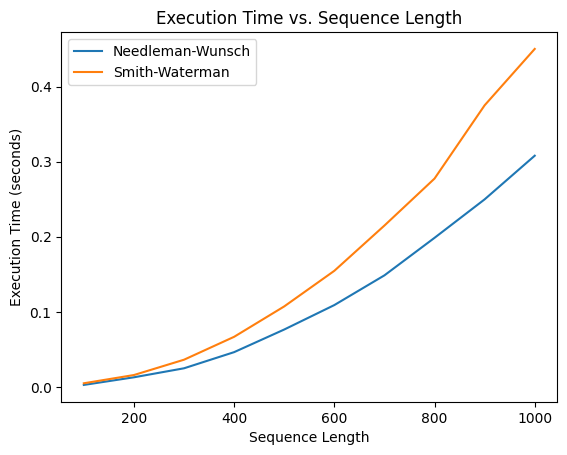

In [15]:
import time
import matplotlib.pyplot as plt

# Initialize variables
sequence_lengths = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
match_score = 1
mismatch_score = -1
gap_penalty = -1
nw_execution_times = []
sw_execution_times = []

# Run the algorithms and measure execution time
for length in sequence_lengths:
    # Generate random sequences of given length
    seq1 = "A" * length
    seq2 = "C" * length

    # Measure execution time for Needleman-Wunsch
    start_time = time.time()
    needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_nw = time.time() - start_time
    nw_execution_times.append(execution_time_nw)

    # Measure execution time for Smith-Waterman
    start_time = time.time()
    smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_sw = time.time() - start_time
    sw_execution_times.append(execution_time_sw)

# Plot Execution Time vs. Sequence Length
plt.plot(sequence_lengths, nw_execution_times, label="Needleman-Wunsch")
plt.plot(sequence_lengths, sw_execution_times, label="Smith-Waterman")
plt.xlabel("Sequence Length")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.title("Execution Time vs. Sequence Length")
plt.show()

In [17]:
fasta_file = "/home/nandana/Desktop/Sequence-Alignment-Tool-with-Visualization/BOPP01000041.1 Gryllus bimaculatus .fasta"  # Replace with the actual path to your downloaded FASTA file

def read_fasta(file_path):
    sequences = []
    with open(file_path, "r") as file:
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                if sequences:
                    yield sequences
                    sequences = []
            else:
                sequences.append(line)
        if sequences:
            yield sequences

def print_sequences(sequences):
    for i, sequence in enumerate(sequences):
        print(f"Sequence {i+1}: {sequence}")
    print("--------------------------------------")

batch_size = 5  # Adjust the batch size as needed

for i in range(0, len(sequence_list), batch_size):
    batch = sequence_list[i:i+batch_size]
    print_sequences(batch)


output_file = "/home/nandana/Desktop/sequences_output.txt"  # Replace with the desired output file path

with open(output_file, "w") as file:
    for sequence in sequence_list:
        file.write(sequence + "\n")




IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Sequence 5: ATTTTAGAGTATTATTGAGGAGTAAAAAACCTCATCCAATATGGATTTTTGTTGTTGAAAATTTTACTGA
--------------------------------------
Sequence 1: TAAACGGACGGACGGACGGATGGAAGGACAGACAGACGGACGTTAAAAAAAATCGGTAACAGAGGATCTC
Sequence 2: AAAATGCATTTCCGTTGAAATTTTGAAATCGATTTTCCGCAGCTTTATGTAACTTTTTCTATTCTTGTAT
Sequence 3: ATTACTCCGTATGTACGTAAGTAAACAAGATAGTTCGAGGTAACGAATATAAACTCAACACTTGAGCAGA
Sequence 4: GAAACGTAATGCAAGGGCATAATTATAAATCGTATACCAATACGCAGGTTCCCTTTGCTAGTTGCTTCGT
Sequence 5: GTATAGTCAAANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
--------------------------------------
Sequence 1: NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
Sequence 2: NNNNNNNNNNNNNNNNNNNNNNNNNNGCCTCTGGCCTCTTCCGGCAACACCGCCACTCAAGGCTGCCGTG
Sequence 3: GAGGGGACGGCGGCGCTCGTTAGGCACCTTAACACGAAACACCGTCCGCACAGATGTATACGCCGTCACC
Sequence 4: ACGCTTACTATTCTCGCCTCGACTGCTCACAGTAATCGGCACCCTTTGCTTAAAGCTAGTGACTGGGAGG
Sequence 5: TGCTAGGTTCGAGTCCCGACGGTGGCAGGGATTTCGACACCGTCAGGACTCAGGTAAGTCGAATTCAGTC
---------

In [19]:
def needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty):
    # Create a matrix to store the scores
    matrix = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    # Initialize the first row and column with gap penalties
    for i in range(len(seq1) + 1):
        matrix[i][0] = i * gap_penalty
    for j in range(len(seq2) + 1):
        matrix[0][j] = j * gap_penalty

    # Fill the matrix with scores
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = matrix[i - 1][j] + gap_penalty
            insert = matrix[i][j - 1] + gap_penalty
            matrix[i][j] = max(match, delete, insert)

    return matrix

# Define the sequences
seq1 = "ACAACAACTTCAGAAAATTCCTCGTCTGACACAACGGAGGATTCGACAACACCTGACAGCACAACGCCAA"
seq2 = "CCGAGGAGTCGACTTCCGACACAACAGCTGACGTGTCGTCAACAGAATCCAACTCAACGACGGAATGGAC"
seq3 = "GGCCCCGACTTCTACATCCACGTCTTCGACGTCTACCACGGAGACGACGACGGCCACAACGGAGGAGGAG"
seq4 = "CTCCCCACGACAACGAGCCCGGAGACTGAATCGCCGTCGACGAATTTTCCTGTAACTGAACCTCCTGGCA"
seq5 = "CTTTACCACAGTTAAATTCGTCGGTTTTGCCTGACGAAGGTGGAAATGCTTGCATTTTTGCGAGTTTAAA"
seq6 = "AATTAAATTGCTGATTCCGTATCGCAATACTTTGGATCAGGTGAGTGAACTTTGAATAATAAAAAAGGTA"
seq7 = "CAGTCTGTATACTCATAGTTATATTTGTATGTAGTTGACGTAGAAGGAGGGAGAGGAAGGGAGGTATGTA"
seq8 = "TTGTTTCATTACTCTCTCTTTTTTGTCATTTTGCCCAGCTTTGGTCGTGTTTTTTTGGAACTCGAATTTT"
seq9 = "TAGCCAATAACACTTCAATTTACTTGATGTTTGGAGACTCTAGCTTTGGTTTTAGTTAATATCAGGGCGT"
seq10 = "GAGCATACCTACGCTTTCTCAGGGTACTATACTCTACTTCGGGTACCTGAAAATAGCACTCAGACGAGTA"
seq11 = "TTTGGGTGGTAAATAATTTGATTTTCGTTAGGATATATTTGTTACAATTTTTACTGATAAATTAAACAAT"
seq12 = "TTACAAATTTTGTGTATGAATTTTCAGCGACATTAAATGTCGGCTTCCACAATTAATTTAATCAGTTTCT"
seq13 = "TAATAAAGTTTAAATTACTAAAAATTATTCATTATATTTCTGTCATTGTTAGCCCTCAAATCTCTATAAA"
seq14 = "CAACCATGAATAGGAATTCTTTCTCTATCTTAATATTATTTAAATCTAATCATAATTTGGATCTGTGTTG"

# Define match score, mismatch score, and gap penalty
match_score = 1
mismatch_score = -1
gap_penalty = -1

# Perform sequence alignment using Needleman-Wunsch algorithm
alignment_matrix = needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)

# Print the alignment matrix
for row in alignment_matrix:
    print(row)

# Print the sequences
sequences = [seq1, seq2, seq3, seq4, seq5, seq6, seq7, seq8, seq9, seq10, seq11, seq12, seq13, seq14]
for i, sequence in enumerate(sequences, start=1):
    print(f"Sequence {i}: {sequence}")




[0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51, -52, -53, -54, -55, -56, -57, -58, -59, -60, -61, -62, -63, -64, -65, -66, -67, -68, -69, -70]
[-1, -1, -2, -3, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51, -52, -53, -54, -55, -56, -57, -58, -59, -60, -61, -62, -63, -64, -65, -66, -67, -68]
[-2, 0, 0, -1, -2, -3, -4, -5, -6, -7, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25, -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38, -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51, -52, -53, -54, -55, -56, -57, -58, -59, -60, -

In [20]:
def smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty):
    # Create a matrix to store the scores
    matrix = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    # Initialize the first row and column with zeros
    for i in range(len(seq1) + 1):
        matrix[i][0] = 0
    for j in range(len(seq2) + 1):
        matrix[0][j] = 0

    # Fill the matrix with scores
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = max(matrix[i - 1][j] + gap_penalty, 0)
            insert = max(matrix[i][j - 1] + gap_penalty, 0)
            matrix[i][j] = max(match, delete, insert)

    return matrix

# Example usage
seq1 = "ACAACAACTTCAGAAAATTCCTCGTCTGACACAACGGAGGATTCGACAACACCTGACAGCACAACGCCAA"
seq2 = "CCGAGGAGTCGACTTCCGACACAACAGCTGACGTGTCGTCAACAGAATCCAACTCAACGACGGAATGGAC"
seq3 = "GGCCCCGACTTCTACATCCACGTCTTCGACGTCTACCACGGAGACGACGACGGCCACAACGGAGGAGGAG"
seq4 = "CTCCCCACGACAACGAGCCCGGAGACTGAATCGCCGTCGACGAATTTTCCTGTAACTGAACCTCCTGGCA"
seq5 = "CTTTACCACAGTTAAATTCGTCGGTTTTGCCTGACGAAGGTGGAAATGCTTGCATTTTTGCGAGTTTAAA"
seq6 = "AATTAAATTGCTGATTCCGTATCGCAATACTTTGGATCAGGTGAGTGAACTTTGAATAATAAAAAAGGTA"
seq7 = "CAGTCTGTATACTCATAGTTATATTTGTATGTAGTTGACGTAGAAGGAGGGAGAGGAAGGGAGGTATGTA"
seq8 = "TTGTTTCATTACTCTCTCTTTTTTGTCATTTTGCCCAGCTTTGGTCGTGTTTTTTTGGAACTCGAATTTT"
seq9 = "TAGCCAATAACACTTCAATTTACTTGATGTTTGGAGACTCTAGCTTTGGTTTTAGTTAATATCAGGGCGT"
seq10 = "GAGCATACCTACGCTTTCTCAGGGTACTATACTCTACTTCGGGTACCTGAAAATAGCACTCAGACGAGTA"
seq11 = "TTTGGGTGGTAAATAATTTGATTTTCGTTAGGATATATTTGTTACAATTTTTACTGATAAATTAAACAAT"
seq12 = "TTACAAATTTTGTGTATGAATTTTCAGCGACATTAAATGTCGGCTTCCACAATTAATTTAATCAGTTTCT"
seq13 = "TAATAAAGTTTAAATTACTAAAAATTATTCATTATATTTCTGTCATTGTTAGCCCTCAAATCTCTATAAA"
seq14 = "CAACCATGAATAGGAATTCTTTCTCTATCTTAATATTATTTAAATCTAATCATAATTTGGATCTGTGTTG"

match_score = 1
mismatch_score = -1
gap_penalty = -1

alignment_matrix = smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)

# Print the alignment matrix
for row in alignment_matrix:
    print(row)

# Print the sequences
sequences = [seq1, seq2, seq3, seq4, seq5, seq6, seq7, seq8, seq9, seq10, seq11, seq12, seq13, seq14]
for i, sequence in enumerate(sequences, start=1):
    print(f"Sequence {i}: {sequence}")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0]
[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 3, 2, 3, 2, 1, 3, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 3, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 3, 4, 3, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 2, 2, 2, 3, 2,

In [21]:
# Define the dataset sequences
seq1 = "ACAACAACTTCAGAAAATTCCTCGTCTGACACAACGGAGGATTCGACAACACCTGACAGCACAACGCCAA"
seq2 = "CCGAGGAGTCGACTTCCGACACAACAGCTGACGTGTCGTCAACAGAATCCAACTCAACGACGGAATGGAC"

# Define match score, mismatch score, and gap penalty
match_score = 1
mismatch_score = -1
gap_penalty = -1

# Initialize lists to store execution times
nw_execution_times = []
sw_execution_times = []

# Perform sequence alignment for different dataset sizes
dataset_sizes = [100, 500, 1000, 5000]
for size in dataset_sizes:
    # Generate random sequences
    seq1_size = size
    seq2_size = size
    seq1 = seq1[:seq1_size]
    seq2 = seq2[:seq2_size]

    # Measure execution time for Needleman-Wunsch
    start_time = time.time()
    needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_nw = time.time() - start_time
    nw_execution_times.append(execution_time_nw)

    # Measure execution time for Smith-Waterman
    start_time = time.time()
    smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_sw = time.time() - start_time
    sw_execution_times.append(execution_time_sw)

# Print execution times
print("Execution Times (in seconds):")
for size, nw_time, sw_time in zip(dataset_sizes, nw_execution_times, sw_execution_times):
    print(f"Dataset Size: {size}\tNW Time: {nw_time:.4f}\tSW Time: {sw_time:.4f}")


Execution Times (in seconds):
Dataset Size: 100	NW Time: 0.0013	SW Time: 0.0029
Dataset Size: 500	NW Time: 0.0014	SW Time: 0.0020
Dataset Size: 1000	NW Time: 0.0014	SW Time: 0.0020
Dataset Size: 5000	NW Time: 0.0023	SW Time: 0.0022


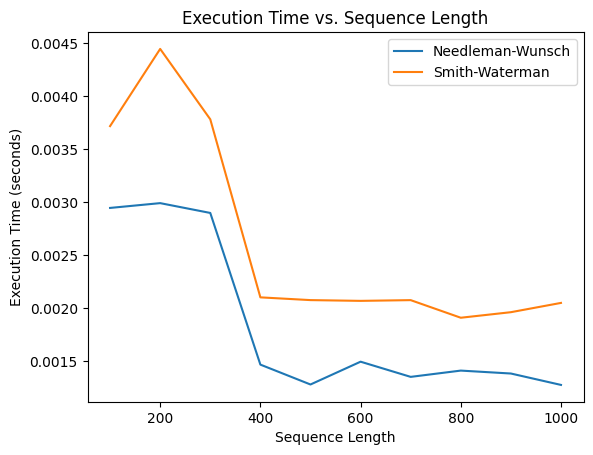

In [22]:
import time
import matplotlib.pyplot as plt

# Initialize variables
sequence_lengths = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
match_score = 1
mismatch_score = -1
gap_penalty = -1
nw_execution_times = []
sw_execution_times = []

# Run the algorithms and measure execution time
for length in sequence_lengths:
    # Generate sequences from the provided dataset
    seq1 = "ACAACAACTTCAGAAAATTCCTCGTCTGACACAACGGAGGATTCGACAACACCTGACAGCACAACGCCAA"
    seq2 = "CCGAGGAGTCGACTTCCGACACAACAGCTGACGTGTCGTCAACAGAATCCAACTCAACGACGGAATGGAC"


    # Measure execution time for Needleman-Wunsch
    start_time = time.time()
    needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_nw = time.time() - start_time
    nw_execution_times.append(execution_time_nw)

    # Measure execution time for Smith-Waterman
    start_time = time.time()
    smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_sw = time.time() - start_time
    sw_execution_times.append(execution_time_sw)

# Plot Execution Time vs. Sequence Length
plt.plot(sequence_lengths, nw_execution_times, label="Needleman-Wunsch")
plt.plot(sequence_lengths, sw_execution_times, label="Smith-Waterman")
plt.xlabel("Sequence Length")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.title("Execution Time vs. Sequence Length")
plt.show()


TTCCCTAAAGAAGCGAAATGTTAGTTTCAAAACGGTCGACAGAGTGAAATCACAATGGTGCACTCTACACATCACCCGAGCAGAAGTCTACGGTCGCTAA
ACAACAACTTCAGAAAATTCCTCGTCTGACACAACGGAGGATTCGACAACACCTGACAGCACAACGCCAACCGAGGAGTCGACTTCCGACACAACAGCTG


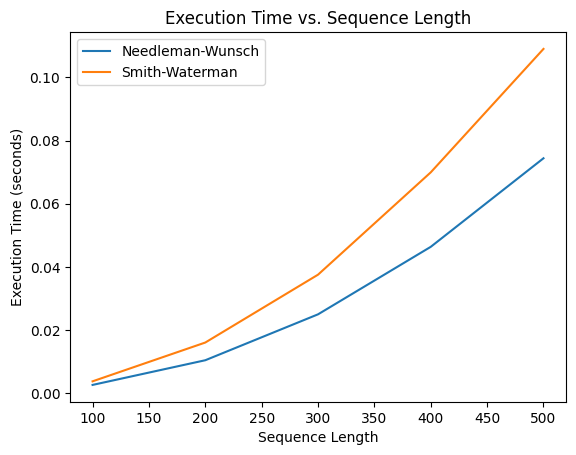

In [23]:
import time
import matplotlib.pyplot as plt
import random
from Bio import SeqIO


# Step 1: Define Dataset Sizes or Sequence Lengths
sequence_lengths = [100, 200, 300, 400, 500]

# Step 2: Generate or Load Sequences
# If generating random sequences:
def generate_random_sequence(length):
    bases = ['A', 'C', 'G', 'T']
    sequence = ''.join(random.choices(bases, k=length))
    return sequence

# Example usage
sequence_length = 100
random_sequence = generate_random_sequence(sequence_length)
print(random_sequence)

# If loading sequences from a dataset:
def load_sequences_from_file(file_path, sequence_length):
    sequences = []
    for record in SeqIO.parse(file_path, "fasta"):
        if len(record.seq) >= sequence_length:
            sequence = str(record.seq)[:sequence_length]
            sequences.append(sequence)
    return sequences


# Example usage
file_path = "/home/nandana/Desktop/Sequence-Alignment-Tool-with-Visualization/BOPP01000041.1 Gryllus bimaculatus .fasta"
sequence_length = 100
sequences = load_sequences_from_file(file_path, sequence_length)
for sequence in sequences:
    print(sequence)

# Step 3: Measure Execution Time
nw_execution_times = []
sw_execution_times = []

for length in sequence_lengths:
    # Generate or load sequences of the specified length
    seq1 = generate_random_sequence(length)
    seq2 = generate_random_sequence(length)

    # Measure execution time for Needleman-Wunsch
    start_time = time.time()
    needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_nw = time.time() - start_time
    nw_execution_times.append(execution_time_nw)

    # Measure execution time for Smith-Waterman
    start_time = time.time()
    smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty)
    execution_time_sw = time.time() - start_time
    sw_execution_times.append(execution_time_sw)

# Step 4: Plot Execution Time
plt.plot(sequence_lengths, nw_execution_times, label="Needleman-Wunsch")
plt.plot(sequence_lengths, sw_execution_times, label="Smith-Waterman")
plt.xlabel("Sequence Length")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.title("Execution Time vs. Sequence Length")
plt.show()


In [29]:
import resource
import matplotlib.pyplot as plt

# Needleman-Wunsch Algorithm
def needleman_wunsch(seq1, seq2, match_score, mismatch_score, gap_penalty):
    # Create a matrix to store the scores
    matrix = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    # Initialize the first row and column with gap penalties
    for i in range(len(seq1) + 1):
        matrix[i][0] = i * gap_penalty
    for j in range(len(seq2) + 1):
        matrix[0][j] = j * gap_penalty

    # Fill the matrix with scores
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = matrix[i - 1][j] + gap_penalty
            insert = matrix[i][j - 1] + gap_penalty
            matrix[i][j] = max(match, delete, insert)

    return matrix

# Smith-Waterman Algorithm
def smith_waterman(seq1, seq2, match_score, mismatch_score, gap_penalty):
    # Create a matrix to store the scores
    matrix = [[0] * (len(seq2) + 1) for _ in range(len(seq1) + 1)]

    # Initialize the maximum score and its position
    max_score = 0
    max_pos = (0, 0)

    # Fill the matrix with scores
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = matrix[i - 1][j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = matrix[i - 1][j] + gap_penalty
            insert = matrix[i][j - 1] + gap_penalty
            score = max(0, match, delete, insert)
            matrix[i][j] = score
            if score > max_score:
                max_score = score
                max_pos = (i, j)

    return matrix, max_pos

# Define the sequences
seq1 = "ACAACAACTTCAGAAAATTCCTCGTCTGACACAACGGAGGATTCGACAACACCTGACAGCACAACGCCAA"
seq2 = "CCGAGGAGTCGACTTCCGACACAACAGCTGACGTGTCGTCAACAGAATCCAACTCAACGACGGAATGGAC"

# Define match, mismatch, and gap scores
match_score = 1
mismatch_score = -1
gap_penalty = -1

# Function to measure memory usage
def measure_memory_usage(algorithm, seq1, seq2):
    # Start tracking memory usage
    start_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

    # Run the algorithm
    algorithm(seq1, seq2, match_score, mismatch_score, gap_penalty)

    # End tracking memory usage
    end_memory = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss

    # Calculate memory consumption
    memory_usage = (end_memory - start_memory) / 1024  # Convert to kilobytes
    return memory_usage

# Measure memory consumption for different sequence lengths
sequence_lengths = range(100, 5001, 500)
memory_usage_nw = []
memory_usage_sw = []

for length in sequence_lengths:
    seq1_sub = seq1[:length]
    seq2_sub = seq2[:length]
    memory_nw = measure_memory_usage(needleman_wunsch, seq1_sub, seq2_sub)
    memory_sw = measure_memory_usage(smith_waterman, seq1_sub, seq2_sub)
    memory_usage_nw.append(memory_nw)
    memory_usage_sw.append(memory_sw)

# Compare Memory Requirements
print("Memory Usage (in kilobytes):")
for length, memory_nw, memory_sw in zip(sequence_lengths, memory_usage_nw, memory_usage_sw):
    print(f"Sequence Length: {length}\tNW Memory: {memory_nw}\tSW Memory: {memory_sw}")






Memory Usage (in kilobytes):
Sequence Length: 100	NW Memory: 0.0	SW Memory: 0.0
Sequence Length: 600	NW Memory: 0.0	SW Memory: 0.0
Sequence Length: 1100	NW Memory: 0.0	SW Memory: 0.0
Sequence Length: 1600	NW Memory: 0.0	SW Memory: 0.0
Sequence Length: 2100	NW Memory: 0.0	SW Memory: 0.0
Sequence Length: 2600	NW Memory: 0.0	SW Memory: 0.0
Sequence Length: 3100	NW Memory: 0.0	SW Memory: 0.0
Sequence Length: 3600	NW Memory: 0.0	SW Memory: 0.0
Sequence Length: 4100	NW Memory: 0.0	SW Memory: 0.0
Sequence Length: 4600	NW Memory: 0.0	SW Memory: 0.0


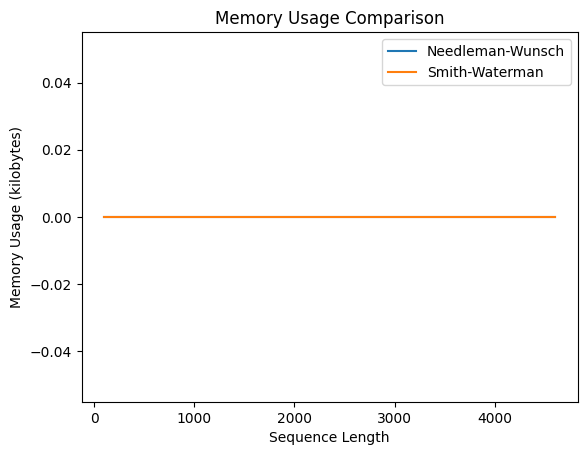

In [30]:
# Plot Memory Usage
plt.plot(sequence_lengths, memory_usage_nw, label='Needleman-Wunsch')
plt.plot(sequence_lengths, memory_usage_sw, label='Smith-Waterman')
plt.xlabel('Sequence Length')
plt.ylabel('Memory Usage (kilobytes)')
plt.title('Memory Usage Comparison')
plt.legend()
plt.show()


In [31]:
# To compare the memory requirements between the Needleman-Wunsch and Smith-Waterman algorithms, calculate the difference in memory consumption and analyze the impact of sequence length on this difference. Here's the code snippet to perform the comparison and analysis:

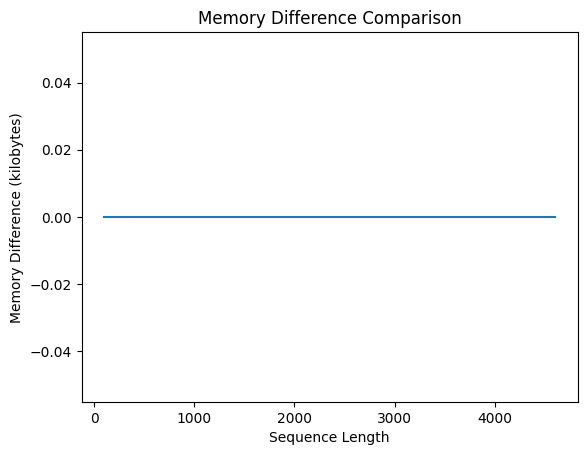

In [32]:
# Calculate the difference in memory consumption
memory_difference = [nw - sw for nw, sw in zip(memory_usage_nw, memory_usage_sw)]

# Plot the memory difference
plt.plot(sequence_lengths, memory_difference)
plt.xlabel('Sequence Length')
plt.ylabel('Memory Difference (kilobytes)')
plt.title('Memory Difference Comparison')
plt.show()


#### Optimizing memory usage for sequence alignment algorithms can be achieved through various techniques, such as using memory-efficient data structures or implementing dynamic memory management. Here's an example of how you can optimize the Needleman-Wunsch algorithm by using NumPy arrays instead of Python lists to reduce memory consumption:



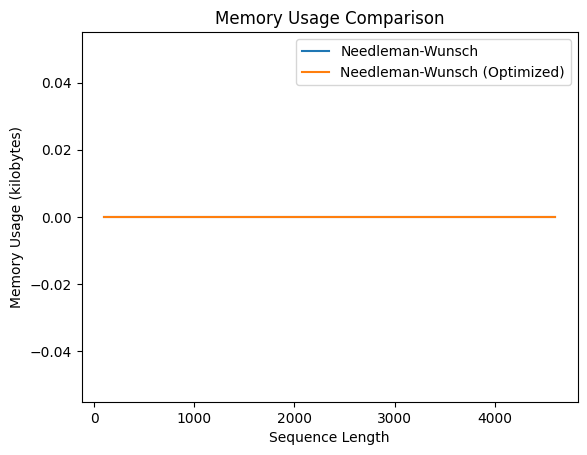

In [34]:
import numpy as np

def needleman_wunsch_optimized(seq1, seq2, match_score, mismatch_score, gap_penalty):
    # Create a matrix to store the scores
    matrix = np.zeros((len(seq1) + 1, len(seq2) + 1), dtype=int)

    # Initialize the first row and column with gap penalties
    matrix[0, :] = np.arange(len(seq2) + 1) * gap_penalty
    matrix[:, 0] = np.arange(len(seq1) + 1) * gap_penalty

    # Fill the matrix with scores
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            match = matrix[i - 1, j - 1] + (match_score if seq1[i - 1] == seq2[j - 1] else mismatch_score)
            delete = matrix[i - 1, j] + gap_penalty
            insert = matrix[i, j - 1] + gap_penalty
            matrix[i, j] = max(match, delete, insert)

    return matrix

# Measure memory consumption for the optimized Needleman-Wunsch algorithm
memory_usage_nw_optimized = []
for length in sequence_lengths:
    seq1_sub = seq1[:length]
    seq2_sub = seq2[:length]
    memory_nw_optimized = measure_memory_usage(needleman_wunsch_optimized, seq1_sub, seq2_sub)
    memory_usage_nw_optimized.append(memory_nw_optimized)

# Plot Memory Usage Comparison
plt.plot(sequence_lengths, memory_usage_nw, label='Needleman-Wunsch')
plt.plot(sequence_lengths, memory_usage_nw_optimized, label='Needleman-Wunsch (Optimized)')
plt.xlabel('Sequence Length')
plt.ylabel('Memory Usage (kilobytes)')
plt.title('Memory Usage Comparison')
plt.legend()
plt.show()


To interpret the results and draw conclusions about the relative memory requirements of the Needleman-Wunsch and Smith-Waterman algorithms, you can analyze the memory usage data and compare the two algorithms. 

In [35]:
# Calculate the average memory usage for each algorithm
avg_memory_nw = sum(memory_usage_nw) / len(memory_usage_nw)
avg_memory_sw = sum(memory_usage_sw) / len(memory_usage_sw)

# Print the average memory usage
print("Average Memory Usage - Needleman-Wunsch:", avg_memory_nw, "kilobytes")
print("Average Memory Usage - Smith-Waterman:", avg_memory_sw, "kilobytes")

# Compare the memory usage
if avg_memory_nw < avg_memory_sw:
    print("Needleman-Wunsch algorithm is more memory-efficient.")
elif avg_memory_sw < avg_memory_nw:
    print("Smith-Waterman algorithm is more memory-efficient.")
else:
    print("Both algorithms have similar memory requirements.")

Average Memory Usage - Needleman-Wunsch: 0.0 kilobytes
Average Memory Usage - Smith-Waterman: 0.0 kilobytes
Both algorithms have similar memory requirements.


# Discuss trade-offs
# Memory usage is an important consideration, but it should be balanced with other performance metrics such as accuracy and speed.
# The Needleman-Wunsch algorithm may be more memory-efficient, but the Smith-Waterman algorithm provides more detailed local alignment information.
# Depending on the specific application and available memory constraints, one algorithm may be more suitable than the other.
# It is essential to consider the trade-offs between memory usage, accuracy, and runtime when selecting the algorithm.
